# Dijkstra Algorithm

In [1]:
%load_ext tikzmagic

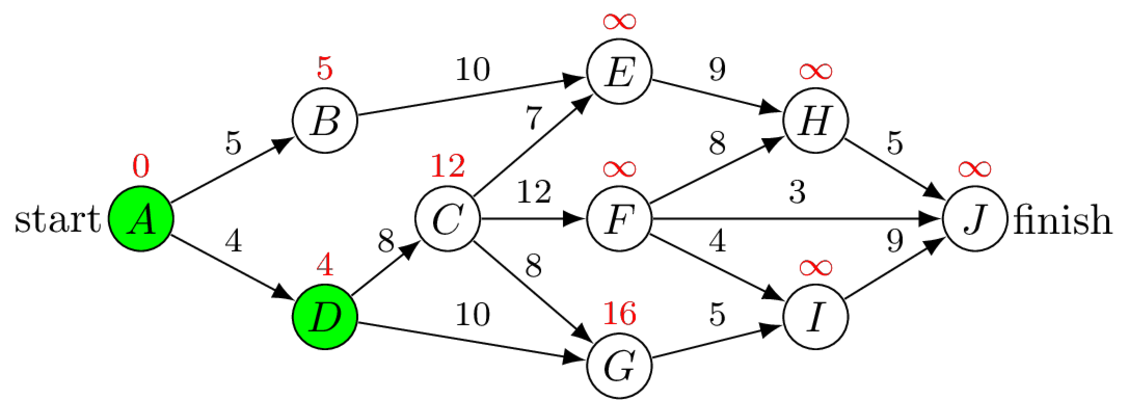

In [11]:
%%tikz -s 1200,400 -l shapes -f png 
    \tikzset{-latex, thick,
        node/.style={shape=circle, draw, inner sep = 1, minimum size=15},
        visited/.style={node, fill=green},
        node text/.style={red, above, yshift=6pt, font=\footnotesize},
        edge text/.style={above, font=\footnotesize},
    }
    
	\path (0,0)      node[visited] (A) {$A$} node[node text] {0};
	\path (1.5,0.8)  node[node]    (B) {$B$} node[node text] {5};
	\path (2.5,0)    node[node]    (C) {$C$} node[node text] {12};
	\path (1.5,-0.8) node[visited] (D) {$D$} node[node text] {4};
	\path (3.9,1.2)  node[node]    (E) {$E$} node[node text] {$\infty$};
	\path (3.9,0)    node[node]    (F) {$F$} node[node text] {$\infty$};
	\path (3.9,-1.2) node[node]    (G) {$G$} node[node text] {16};
	\path (5.5,0.8)  node[node]    (H) {$H$} node[node text] {$\infty$};
	\path (5.5,-0.8) node[node]    (I) {$I$} node[node text] {$\infty$};
	\path (6.8,0)    node[node]    (J) {$J$} node[node text] {$\infty$};
	
	\draw (A) node[left, xshift = -5pt]{start};
	\draw (A) edge node[edge text]{5}  (B);
	\draw (A) edge node[edge text]{4}  (D);
	\draw (D) edge node[edge text]{8}  (C);
	\draw (B) edge node[edge text]{10} (E);
	\draw (C) edge node[edge text]{7}  (E);
	\draw (C) edge node[edge text]{12} (F);
	\draw (C) edge node[edge text]{8}  (G);
	\draw (D) edge node[edge text]{10} (G); %{12} (G);
	\draw (E) edge node[edge text]{9}  (H);
	\draw (F) edge node[edge text]{3}  (J); %{8}  (J);
	\draw (F) edge node[edge text]{4}  (I);
	\draw (H) edge node[edge text]{5}  (J); 
	\draw (G) edge node[edge text]{5}  (I);
	\draw (F) edge node[edge text]{8}  (H);
	\draw (I) edge node[edge text]{9}  (J);
	\draw (J) node[right, xshift = 5pt]{finish};


In [3]:
import itertools
import numpy as np

In [7]:
distances = \
    {('A','B'): 5,
     ('A','D'): 4,
     ('D','C'): 8,
     ('D','G'): 10, #     ('D','G'): 12,
     ('B','E'): 10,
     ('C','E'): 7,
     ('C','F'): 12,
     ('C','G'): 8,
     ('E','H'): 9,
     ('G','I'): 5,
     ('F','H'): 8,
     ('F','J'): 3, #('F','J'): 8,
     ('F','I'): 4,
     ('H','J'): 5,
     ('I','J'): 9,
    }
    
startNode = 'A'
endNode = 'J'

In [8]:
nodes = {}
for pair in distances.keys():
    nodes[pair[0]] = None
    nodes[pair[1]] = None
for nd in nodes:
    nodes[nd] = [np.inf,'']

nodes[startNode][0] = 0
currentNode = startNode
remainingNodes = set(nodes.keys())
while currentNode != endNode:
    distanceToCurrent = nodes[currentNode][0]
    remainingNodes.remove(currentNode)
    for toNode in remainingNodes:
        if (currentNode, toNode) in distances:
            newDistance = nodes[currentNode][0] + distances[(currentNode, toNode)]
            if nodes[toNode][0] > newDistance:
                nodes[toNode][0] = newDistance
                nodes[toNode][1] = currentNode
    currentNode = min((x for x in nodes.items() if x[0] in remainingNodes), key=lambda x: x[1][0])[0] 

while [nd[-1] for nd in nodes.values()].count('') < len(nodes):
    for nd in nodes:
        if nodes[nd][-1] in nodes:
            nodes[nd].append(nodes[nodes[nd][-1]][1])

In [9]:
nodes

{'A': [0, ''],
 'B': [5, 'A', ''],
 'C': [12, 'D', 'A', ''],
 'D': [4, 'A', ''],
 'E': [15, 'B', 'A', ''],
 'F': [24, 'C', 'D', 'A', ''],
 'G': [14, 'D', 'A', ''],
 'H': [24, 'E', 'B', 'A', ''],
 'I': [19, 'G', 'D', 'A', ''],
 'J': [27, 'F', 'C', 'D', 'A', '']}

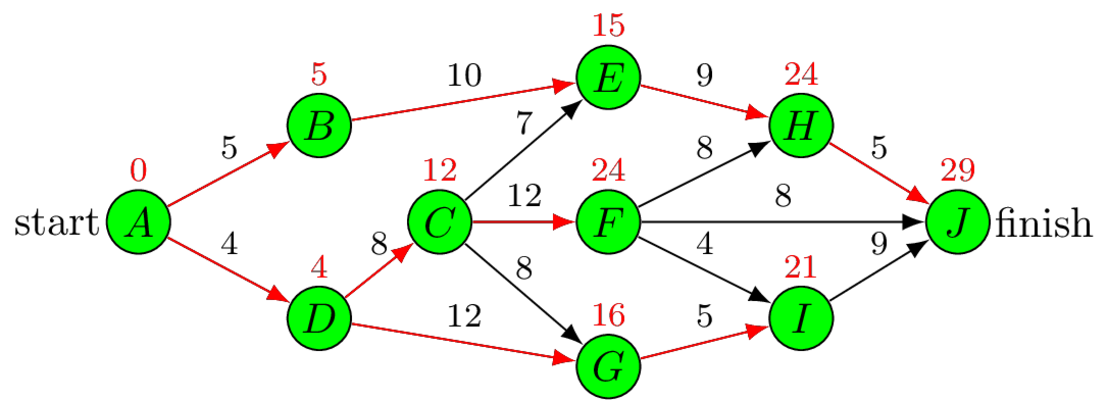

In [7]:
%%tikz -s 1200,400 -l shapes -f png 
    \tikzset{-latex, thick,
        node/.style={shape=circle, draw, inner sep = 1, minimum size=15},
        visited/.style={node, fill=green},
        node text/.style={red, above, yshift=6pt, font=\footnotesize},
        edge text/.style={above, font=\footnotesize},
    }
    
	\path (0,0)      node[visited] (A) {$A$} node[node text] {0};
	\path (1.5,0.8)  node[visited] (B) {$B$} node[node text] {5};
	\path (2.5,0)    node[visited] (C) {$C$} node[node text] {12};
	\path (1.5,-0.8) node[visited] (D) {$D$} node[node text] {4};
	\path (3.9,1.2)  node[visited] (E) {$E$} node[node text] {15};
	\path (3.9,0)    node[visited] (F) {$F$} node[node text] {24};
	\path (3.9,-1.2) node[visited] (G) {$G$} node[node text] {16};
	\path (5.5,0.8)  node[visited] (H) {$H$} node[node text] {24};
	\path (5.5,-0.8) node[visited] (I) {$I$} node[node text] {21};
	\path (6.8,0)    node[visited] (J) {$J$} node[node text] {29};
	
	\draw (A) node[left, xshift = -5pt]{start};
	\draw (A) edge node[edge text]{5}  (B);
	\draw (A) edge node[edge text]{4}  (D);
	\draw (D) edge node[edge text]{8}  (C);
	\draw (B) edge node[edge text]{10} (E);
	\draw (C) edge node[edge text]{7}  (E);
	\draw (C) edge node[edge text]{12} (F);
	\draw (C) edge node[edge text]{8}  (G);
	\draw (D) edge node[edge text]{12} (G);
	\draw (E) edge node[edge text]{9}  (H);
	\draw (F) edge node[edge text]{8}  (J);
	\draw (F) edge node[edge text]{4}  (I);
	\draw (H) edge node[edge text]{5}  (J); 
	\draw (G) edge node[edge text]{5}  (I);
	\draw (F) edge node[edge text]{8}  (H);
	\draw (I) edge node[edge text]{9}  (J);
	\draw (J) node[right, xshift = 5pt]{finish};
    
	\draw[red] (A) edge (B);
	\draw[red] (D) edge (C);
	\draw[red] (A) edge (D);
	\draw[red] (B) edge (E);
	\draw[red] (C) edge (F);
	\draw[red] (D) edge (G);
	\draw[red] (E) edge (H);
	\draw[red] (G) edge (I);
	\draw[red] (H) edge (J);

In [9]:
import networkx as nx
import pygraphviz as pgv # need pygraphviz or pydot for nx.to_agraph()
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edge(1,2,weight=7)
G.add_edge(2,3,weight=8)
G.add_edge(3,4,weight=1)
G.add_edge(4,1,weight=11)
G.add_edge(1,3)
G.add_edge(2,4)

for u,v,d in G.edges(data=True):
    d['label'] = d.get('weight','')

A = nx.to_agraph(G)
A.layout(prog='dot')
A.draw('test.png')

nx.draw(G)
# plt.savefig("path_graph1.png")
plt.show()

ImportError: cannot import name release

# k-Shortest path algorithm (for directed graph)
------

### The idea
1. Run the Dijkstra algorithm and assign shortest distances $d_j$ to each node
1. For each edge $(i,j)$, assign a number $\Delta_{ij} = d_j-d_i$, extra distance id edge $(i,j)$ is used in the path
1. Create a tree where each node corresponds to a path from start to finish
    - the top node is the shortest path
    - the children nodes correspond to rerouting the parent node path throuth the corresponding edge

In [219]:
deltas = {}
for (frm, to) in distances.keys():
    if not frm in deltas: deltas[frm] = {}
    deltas[frm][to] = nodes[frm][0] - nodes[to][0] + distances[(frm,to)]

In [220]:
deltas

{'A': {'B': 0, 'D': 0},
 'B': {'E': 0},
 'C': {'E': 4, 'F': 0, 'G': 4},
 'D': {'C': 0, 'G': 0},
 'E': {'H': 0},
 'F': {'H': 8, 'I': 7, 'J': 3},
 'G': {'I': 0},
 'H': {'J': 0},
 'I': {'J': 1}}

In [222]:
SPTree = []

In [223]:
SPTree.append(nodes[endNode][0])
SPTree.append([])



In [224]:
SPTree

[29, []]

## Yen's alborithm

In [ ]:
def YenKSP(Graph, source, sink, K):
   # Determine the shortest path from the source to the sink.
   A[0] = Dijkstra(Graph, source, sink);
   # Initialize the heap to store the potential kth shortest path.
   B = [];
   
   for k from 1 to K:
       # The spur node ranges from the first node to the next to last node in the previous k-shortest path.
       for i from 0 to size(A[k − 1]) − 1:
           
           // Spur node is retrieved from the previous k-shortest path, k − 1.
           spurNode = A[k-1].node(i);
           // The sequence of nodes from the source to the spur node of the previous k-shortest path.
           rootPath = A[k-1].nodes(0, i);
           
           for each path p in A:
               if rootPath == p.nodes(0, i):
                   // Remove the links that are part of the previous shortest paths which share the same root path.
                   remove p.edge(i,i + 1) from Graph;
           
           for each node rootPathNode in rootPath except spurNode:
               remove rootPathNode from Graph;
           
           // Calculate the spur path from the spur node to the sink.
           spurPath = Dijkstra(Graph, spurNode, sink);
           
           // Entire path is made up of the root path and spur path.
           totalPath = rootPath + spurPath;
           // Add the potential k-shortest path to the heap.
           B.append(totalPath);
           
           // Add back the edges and nodes that were removed from the graph.
           restore edges to Graph;
           restore nodes in rootPath to Graph;
                   
       if B is empty:
           // This handles the case of there being no spur paths, or no spur paths left.
           // This could happen if the spur paths have already been exhausted (added to A), 
           // or there are no spur paths at all - such as when both the source and sink vertices 
           // lie along a "dead end".
           break;
       // Sort the potential k-shortest paths by cost.
       B.sort();
       // Add the lowest cost path becomes the k-shortest path.
       A[k] = B[0];
       B.pop();
   
   return A;